In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [40]:
df = pd.read_csv('/kaggle/input/premier-league-all-players-stats-2324/premier-player-23-24.csv')

In [41]:
duplicate_columns = df.columns.duplicated()
df = df.loc[:, ~duplicate_columns]

In [42]:
df.head(3)

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City


In [43]:
df.describe()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,24.906897,19.627586,14.413793,1294.584483,14.383448,2.063793,1.481034,3.544828,1.898276,0.165517,...,0.125259,0.091621,0.216810,0.118155,0.209638,0.144983,0.100707,0.245845,0.138431,0.239466
std,4.464593,11.832419,11.926422,1024.720358,11.385342,3.621238,2.360729,5.391389,3.189739,0.779830,...,0.223161,0.160703,0.297085,0.214342,0.287035,0.222225,0.210713,0.348004,0.213947,0.340631
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,9.000000,3.000000,342.750000,3.775000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017500,0.010000,0.060000,0.017500,0.060000
50%,25.000000,20.000000,13.000000,1164.000000,12.950000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.030000,0.000000,0.100000,0.030000,0.100000,0.070000,0.060000,0.145000,0.070000,0.145000
75%,28.000000,30.000000,25.000000,2104.250000,23.400000,2.000000,2.000000,4.000000,2.000000,0.000000,...,0.170000,0.130000,0.310000,0.160000,0.300000,0.190000,0.140000,0.370000,0.180000,0.350000
max,38.000000,38.000000,38.000000,3420.000000,38.000000,27.000000,13.000000,33.000000,20.000000,9.000000,...,2.650000,1.700000,2.650000,2.650000,2.650000,3.230000,4.440000,5.540000,3.230000,5.540000


In [44]:
pl_teams = df['Team'].unique()
print(f"The PL team are : {pl_teams}")


The PL team are : ['Manchester City' 'Liverpool' 'Arsenal' 'Chelsea' 'Newcastle United'
 'Tottenham Hotspur' 'Manchester United' 'Aston Villa' 'West Ham United'
 'Crystal Palace' 'Fulham' 'Everton' 'Brighton' 'Bournemouth'
 'Wolverhampton' 'Brentford' 'Nottingham Forest' 'Luton Town' 'Burnley'
 'Sheffield United']


In [45]:
pl_number_of_players = df['Player'].nunique() 
print(f"The PL number of players is : {pl_number_of_players} ")

The PL number of players is : 570 


In [46]:
most_dominating_nation = df['Nation'].value_counts().idxmax()
numb_of_eng_players = df['Nation'].value_counts().iloc[0]
print(f"The most dominating nation is : {most_dominating_nation} with {numb_of_eng_players} players")


The most dominating nation is : eng ENG with 199 players


<h1>Player Analysis</h1>

In [47]:
top_scorers_df = df.sort_values(by='Gls', ascending=False)
top10G = top_scorers_df[['Player' , "Gls"]][0:10]
print(f"top 10 goal scorers are :")
top10G

top 10 goal scorers are :


,Player,Gls
6,Erling Haaland,27.0
83,Cole Palmer,22.0
117,Alexander Isak,21.0
1,Phil Foden,19.0
204,Ollie Watkins,19.0
369,Dominic Solanke,19.0
28,Mohamed Salah,18.0
146,Son Heung-min,17.0
237,Jarrod Bowen,16.0
59,Bukayo Saka,16.0


In [48]:
assist_masters = df.sort_values(by='Ast', ascending=False)
top10a = assist_masters[['Player' , "Ast"]][0:10]
print(f"top 10 Assit masters are :")
top10a

top 10 Assit masters are :


,Player,Ast
204,Ollie Watkins,13.0
83,Cole Palmer,11.0
154,Brennan Johnson,10.0
13,Kevin De Bruyne,10.0
453,Morgan Gibbs-White,10.0
114,Anthony Gordon,10.0
118,Kieran Trippier,10.0
28,Mohamed Salah,10.0
146,Son Heung-min,10.0
338,Pascal Groß,10.0


In [49]:
df['Total_Contributions'] = df['Gls'] + df['Ast']
top_contributors_df = df.sort_values(by='Total_Contributions', ascending=False)
top10 = top_contributors_df[['Player','Total_Contributions']][0:10]
print(f"top 10 contributers are :")
top10

top 10 contributers are :


,Player,Total_Contributions
83,Cole Palmer,33.0
6,Erling Haaland,32.0
204,Ollie Watkins,32.0
28,Mohamed Salah,28.0
146,Son Heung-min,27.0
1,Phil Foden,27.0
59,Bukayo Saka,25.0
117,Alexander Isak,23.0
369,Dominic Solanke,22.0
237,Jarrod Bowen,22.0


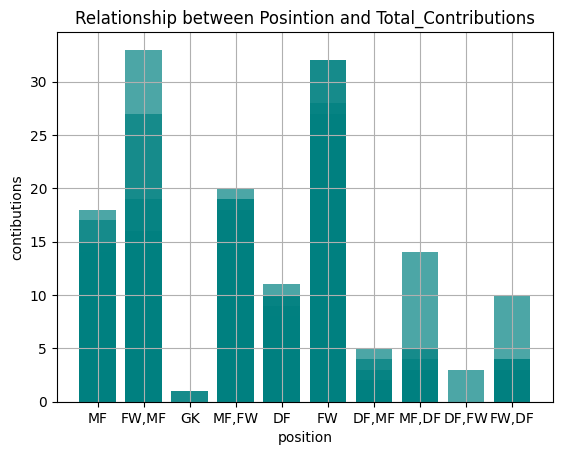

In [50]:
plt.bar(df['Pos'], df['Total_Contributions'], alpha=0.7 , color = 'teal')
plt.title('Relationship between Posintion and Total_Contributions')
plt.xlabel('position')
plt.ylabel('contibutions')
plt.grid(True)
plt.show()

In [51]:
# who is the palyer that likely to start and never get substituted : 

optimal_min = 39 * 90  # Total possible minutes if a player starts and plays every minute of 39 matches
player_actual_min = df['90s']
player_starts_optimal_min = df['Starts']
                 
# Calculate the percentage of matches the player completes
df['completes_match'] = (player_actual_min / player_starts_optimal_min).clip(upper=1) * 100

# Filter for players who complete at least some percentage of their matches
result_df = df[df['completes_match'] > 0]


result_df[['Player' , 'completes_match','Starts' , "Min"]].sort_values(by = ['completes_match','Starts', 'Min'],ascending= [False,False ,False])[0:6]



,Player,completes_match,Starts,Min
55,William Saliba,100.0,38,3420.0
144,Guglielmo Vicario,100.0,38,3420.0
173,André Onana,100.0,38,3420.0
287,Bernd Leno,100.0,38,3420.0
312,Jordan Pickford,100.0,38,3420.0
398,Max Kilman,100.0,38,3420.0


<h3>Most Aggressive Vs most friendly </h3>

In [52]:
turbulent = df[['Player', 'CrdY' ,'CrdR' ,'Starts']].sort_values(by=['CrdY' ,'CrdR','Starts'] ,ascending=  [False , False , False]  )
turbulent[:5]

,Player,CrdY,CrdR,Starts
290,João Palhinha,13.0,0.0,31
373,Marcos Senesi,13.0,0.0,26
114,Anthony Gordon,12.0,1.0,34
401,Mario Lemina,12.0,1.0,34
207,Douglas Luiz,12.0,0.0,35


In [53]:
friendly = df[['Player', 'CrdY' ,'CrdR', 'Starts' ]].sort_values(by=['CrdY' ,'CrdR','Starts'] ,ascending=  [True , True , False]  )
friendly[0:4]

,Player,CrdY,CrdR,Starts
7,Rúben Dias,0.0,0.0,28
10,Nathan Aké,0.0,0.0,24
493,Amari'i Bell,0.0,0.0,21
457,Callum Hudson-Odoi,0.0,0.0,20


<h3>let's talk about the age</h3>

In [54]:
youngest_player =df[['Player' , 'Age']].sort_values(by='Age', ascending=True)[:1]
youngest_player

,Player,Age
171,Mikey Moore,15.0


In [55]:
oldest_players =df[['Player' , 'Age']].sort_values(by='Age', ascending=False)
oldest_players[:4]

,Player,Age
85,Thiago Silva,38.0
319,Ashley Young,38.0
248,Łukasz Fabiański,38.0
356,James Milner,37.0


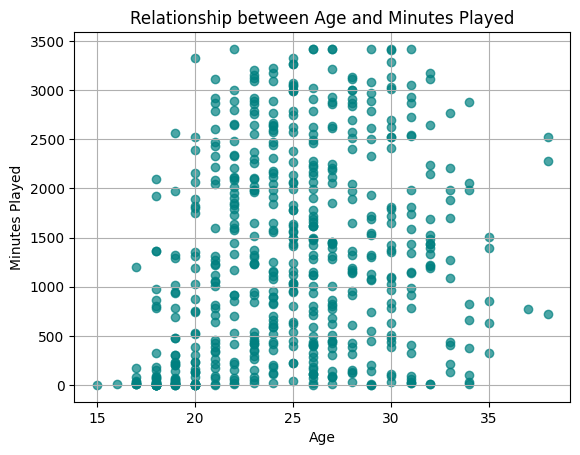

In [56]:
plt.scatter(df['Age'], df['Min'] , alpha=0.7 , color = 'teal')
plt.title('Relationship between Age and Minutes Played')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.show()

<h3> Progressive </h3>

In [57]:
df[['Player', 'PrgC' , 'PrgP' , 'PrgR']].sort_values(by= ['PrgC' , 'PrgP' , 'PrgR'] , ascending = [False , False , False])[0:10]

,Player,PrgC,PrgP,PrgR
11,Jeremy Doku,218.0,57.0,295.0
176,Alejandro Garnacho,178.0,62.0,281.0
59,Bukayo Saka,155.0,126.0,508.0
148,Dejan Kulusevski,151.0,144.0,388.0
5,Bernardo Silva,140.0,177.0,260.0
114,Anthony Gordon,138.0,101.0,232.0
26,Luis Díaz,137.0,113.0,302.0
63,Gabriel Martinelli,127.0,65.0,345.0
494,Chiedozie Ogbene,127.0,53.0,150.0
350,Kaoru Mitoma,121.0,64.0,239.0


In [58]:
df[['Player', 'PrgC']].sort_values(by= 'PrgC' , ascending = False)[0:10]

,Player,PrgC
11,Jeremy Doku,218.0
176,Alejandro Garnacho,178.0
59,Bukayo Saka,155.0
148,Dejan Kulusevski,151.0
5,Bernardo Silva,140.0
114,Anthony Gordon,138.0
26,Luis Díaz,137.0
63,Gabriel Martinelli,127.0
494,Chiedozie Ogbene,127.0
350,Kaoru Mitoma,121.0


In [59]:
df[['Player', 'PrgP']].sort_values(by= 'PrgP' , ascending = False)[0:10]

,Player,PrgP
0,Rodri,376.0
57,Martin Ødegaard,344.0
338,Pascal Groß,302.0
175,Bruno Fernandes,297.0
112,Bruno Guimarães,283.0
56,Declan Rice,278.0
64,Oleksandr Zinchenko,229.0
152,James Maddison,224.0
86,Enzo Fernández,210.0
27,Alexis Mac Allister,209.0


In [60]:
df[['Player', 'PrgR']].sort_values(by= 'PrgR' , ascending = False)[:10]

,Player,PrgR
59,Bukayo Saka,508.0
148,Dejan Kulusevski,388.0
63,Gabriel Martinelli,345.0
28,Mohamed Salah,341.0
146,Son Heung-min,325.0
26,Luis Díaz,302.0
11,Jeremy Doku,295.0
154,Brennan Johnson,293.0
176,Alejandro Garnacho,281.0
341,Simon Adingra,278.0


<h1>Team Analysis</h1>

In [108]:
by_team = df.groupby('Team')
by_team.sum()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Total_Contributions,completes_match
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,William SalibaDeclan RiceMartin ØdegaardBen Wh...,fr FRAeng ENGno NOReng ENGeng ENGbr BRAes ESPd...,"DFMFMFDFFWDFGKMF,FWFWDFFW,MFFWDFDFFWMFMF,DFGKM...",620.0,572,418,37588.0,417.5,86.0,62.0,...,7.25,3.27,6.69,4.42,3.07,7.49,3.95,7.03,148.0,2437.800004
Aston Villa,Ollie WatkinsEzri KonsaJohn McGinnDouglas Luiz...,eng ENGeng ENGsct SCObr BRAar ARGes ESPfr FRAf...,"FWDFMF,FWMFGKDFDFFW,MFDFMF,FWDFMFMF,FWDFDFFW,M...",783.0,569,418,37593.0,417.8,72.0,55.0,...,7.47,4.50,7.35,4.42,2.34,6.74,4.32,6.65,127.0,2780.968015
Bournemouth,Illia ZabarnyiDominic SolankeRyan ChristieNeto...,ua UKReng ENGsct SCObr BRAeng ENGar ARGnl NEDe...,"DFFWMFGKMFDFMF,FWDFFWFWDFDFMFDFFW,DFMFFW,MFDFG...",739.0,588,418,37564.0,417.3,52.0,39.0,...,6.51,3.70,6.45,5.68,2.98,8.66,5.62,8.60,91.0,2814.328206
Brentford,Mark FlekkenVitaly JaneltChristian NørgaardNat...,nl NEDde GERdk DENie IRLcd CODjm JAMdk DENdk D...,"GKMF,DFMFDFFWDFMFDFFWDFFWFW,DFDFDFFWDFMFDFMFDF...",708.0,588,418,37517.0,416.9,54.0,38.0,...,6.32,3.38,6.18,3.97,3.50,7.49,3.86,7.38,92.0,2725.777892
Brighton,Pascal GroßLewis DunkJan Paul van HeckeSimon A...,de GEReng ENGnl NEDci CIVsct SCOnl NEDeng ENGb...,"MF,DFDFDFFWMFGKFW,MFFW,MFDFDFGKFW,MFFWFWMFDFDF...",731.0,594,418,37570.0,417.5,50.0,36.0,...,5.78,3.04,5.58,4.06,3.16,7.21,3.85,7.01,86.0,2852.822154
Burnley,Sander BergeDara O'SheaJames TraffordZeki Amdo...,no NORie IRLeng ENGch SUIbr BRAeng ENGfr FRAen...,"MFDFGKFWDF,MFDFMF,FWMFMFFW,MFMF,FWDFDFDFMF,FWM...",753.0,580,418,37439.0,415.9,40.0,30.0,...,4.04,2.17,3.81,3.35,2.01,5.37,3.17,5.21,70.0,3008.911383
Chelsea,Conor GallagherMoisés CaicedoNicolas JacksonCo...,eng ENGec ECUsn SENeng ENGfr FRAbr BRAar ARGrs...,"MFMFFWFW,MFDFDFMFGKFW,MFDFDFDFFWGKDFFWDFDFFWDF...",705.0,566,418,37520.0,417.0,76.0,51.0,...,7.44,4.10,7.00,7.61,3.07,10.68,7.23,10.31,127.0,2939.211199
Crystal Palace,Joachim AndersenTyrick MitchellJordan AyewJeff...,dk DENeng ENGgh GHAco COLfr FRAeng ENGus USAen...,"DFDF,MFFW,MFMF,DFFWMF,FWDF,MFDFDFMFGKGKFW,MFFW...",667.0,544,418,37598.0,417.9,56.0,43.0,...,5.11,2.50,4.91,2.84,2.32,5.15,2.68,4.99,99.0,2445.920456
Everton,Jordan PickfordJames TarkowskiJarrad Branthwai...,eng ENGeng ENGeng ENGeng ENGeng ENGml MLIua UK...,"GKDFDFMFMF,FWFW,MFDFDF,MFFWMF,FWMFMFDFDFFWDFMF...",666.0,539,418,37566.0,417.2,40.0,17.0,...,3.13,2.37,3.05,4.71,2.48,7.21,4.57,7.08,57.0,2230.736267


In [121]:
most_attacing_team = by_team.sum()['Gls'].sort_values(ascending = False)[:20]
print(most_attacing_team)

Team
Manchester City      94.0
Arsenal              86.0
Newcastle United     83.0
Liverpool            80.0
Chelsea              76.0
Aston Villa          72.0
Tottenham Hotspur    69.0
West Ham United      58.0
Manchester United    57.0
Crystal Palace       56.0
Fulham               54.0
Brentford            54.0
Bournemouth          52.0
Brighton             50.0
Luton Town           49.0
Nottingham Forest    49.0
Wolverhampton        47.0
Burnley              40.0
Everton              40.0
Sheffield United     31.0
Name: Gls, dtype: float64


In [114]:
biggest_squad = by_team['Player'].count().sort_values(ascending=False)[:20]
print(biggest_squad)

Team
Sheffield United     35
Nottingham Forest    33
Chelsea              32
Newcastle United     32
Manchester United    31
Burnley              31
Aston Villa          31
Liverpool            30
Bournemouth          30
Brighton             30
Tottenham Hotspur    29
Brentford            28
Luton Town           28
Wolverhampton        27
Everton              26
Crystal Palace       26
West Ham United      26
Manchester City      25
Fulham               25
Arsenal              25
Name: Player, dtype: int64


In [122]:
biggest_age_mean = by_team.sum()['Age'].sort_values(ascending=False)[:20]
mean = (biggest_age_mean / biggest_squad).sort_values(ascending=False)[:20]

In [120]:
smallest_age_mean = by_team.sum()['Age'].sort_values(ascending=False)[:20]
(smallest_age_mean / biggest_squad).sort_values(ascending=True)[:2]

Team
Chelsea      22.031250
Liverpool    23.833333
dtype: float64

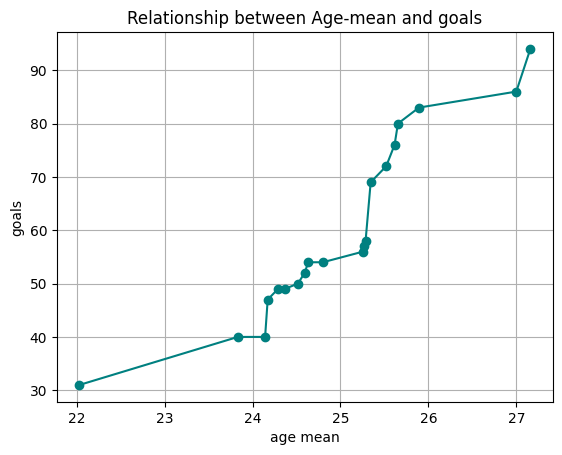

In [127]:
plt.plot(mean,most_attacing_team, marker = 'o' , color = 'teal')
plt.title('Relationship between Age-mean and goals')
plt.xlabel('age mean')
plt.ylabel('goals')
plt.grid(True)
plt.show()